# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Nombre: Elias Bolaños## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

22
El gato se escondió debajo de la cama. {'del': 0, 'importante.': 0, 'el': 1, 'limpia': 0, 'jardín': 0, 'la': 1, 'debajo': 1, 'escondió': 1, 'en': 0, 'perro': 0, 'cómoda.': 0, 'y': 0, 'limpieza': 0, 'cama.': 0, 'cama': 1, 'gato': 1, 'jugaron': 0, 'es': 1, 'de': 2, 'estaba': 0, 'se': 1, 'jardín.': 0}
La cama estaba limpia y cómoda. {'del': 0, 'importante.': 0, 'el': 0, 'limpia': 1, 'jardín': 0, 'la': 1, 'debajo': 0, 'escondió': 0, 'en': 0, 'perro': 0, 'cómoda.': 0, 'y': 1, 'limpieza': 0, 'cama.': 0, 'cama': 1, 'gato': 0, 'jugaron': 0, 'es': 1, 'de': 0, 'estaba': 1, 'se': 0, 'jardín.': 0}
El perro y el gato jugaron en el jardín. {'del': 0, 'importante.': 0, 'el': 3, 'limpia': 0, 'jardín': 1, 'la': 0, 'debajo': 0, 'escondió': 0, 'en': 1, 'perro': 1, 'cómoda.': 0, 'y': 1, 'limpieza': 0, 'cama.': 0, 'cama': 0, 'gato': 1, 'jugaron': 1, 'es': 0, 'de': 0, 'estaba': 0, 'se': 0, 'jardín.': 0}
La limpieza del jardín es importante. {'del': 1, 'importante.': 0, 'el': 1, 'limpia': 0, 'jardín': 1, 

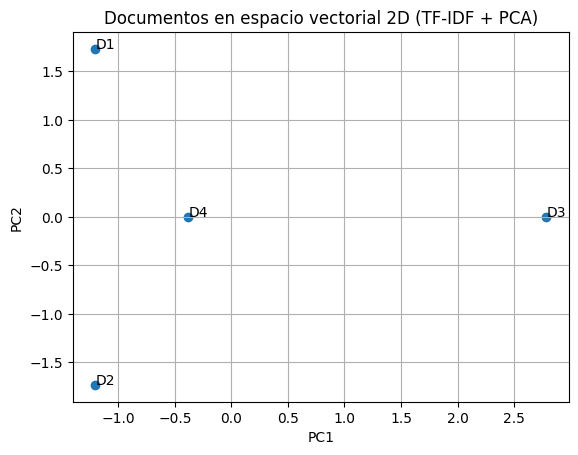

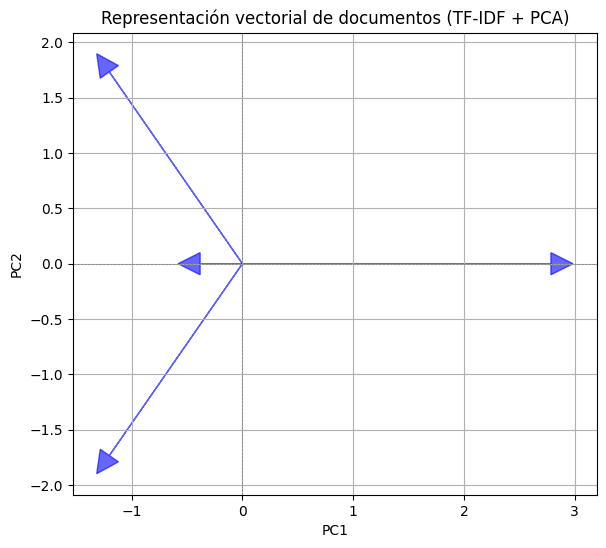

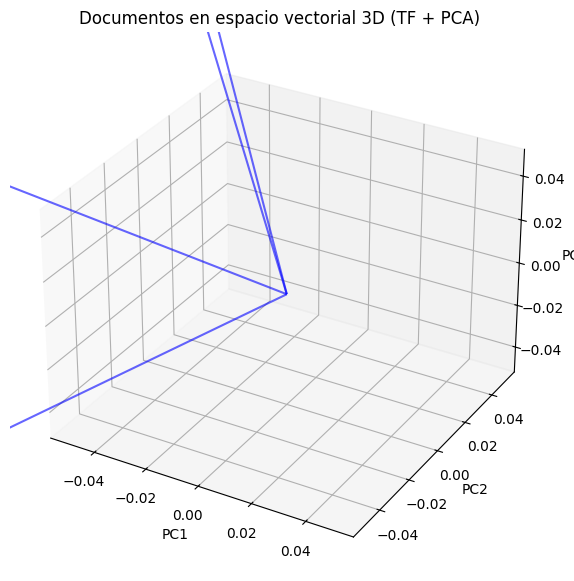

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
documents[0].lower()

vocab = set()
for doc in documents:
    for word in doc.lower().split(sep= " "):
        vocab.add(word)
print(len(vocab))

dict_tf={}
i=0
for doc in documents:
    dict_tfd={} # Crear un diccionario para cada documento
    for term in vocab:
            count=doc.lower().strip('.').count(term)
            dict_tfd[term]=count
    print(doc, dict_tfd)
    dict_tf[i]=dict_tfd # Agregar el diccionario del documento al diccionario de términos
    i += 1
print(dict_tf)

matriz = pd.DataFrame(dict_tf)
matriz

matriz[0]['del']
matriz.to_csv('matriz.csv', sep=',', index=True)
# Representación TF

#Representacion TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)
docs_2d


plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Reducción PCA y visualización 
plt.figure(figsize=(10, 6))
for i,(x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.2, head_length=0.2, fc='blue', ec='blue', alpha=0.6)
    plt.Text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10)
plt.title("Representación vectorial de documentos (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Reducción PCA y visualización 3D
# Reducción PCA y visualización 3D
pca3d = PCA(n_components=3)
docs_3d = pca3d.fit_transform(matriz.T)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6)
    ax.text(x * 1.1, y * 1.1, z * 1.1, f"D{i+1}", fontsize=10)
ax.set_title("Documentos en espacio vectorial 3D (TF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

Similitud coseno consulta - D1: 0.29
Similitud coseno consulta - D2: 0.41
Similitud coseno consulta - D3: 0.00
Similitud coseno consulta - D4: 0.00


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


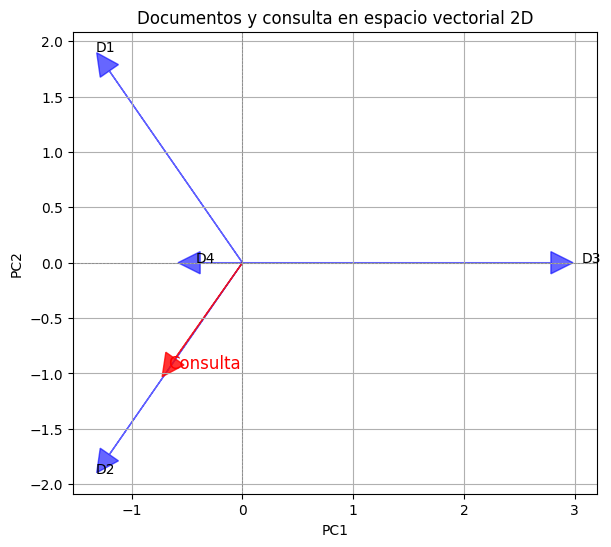

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


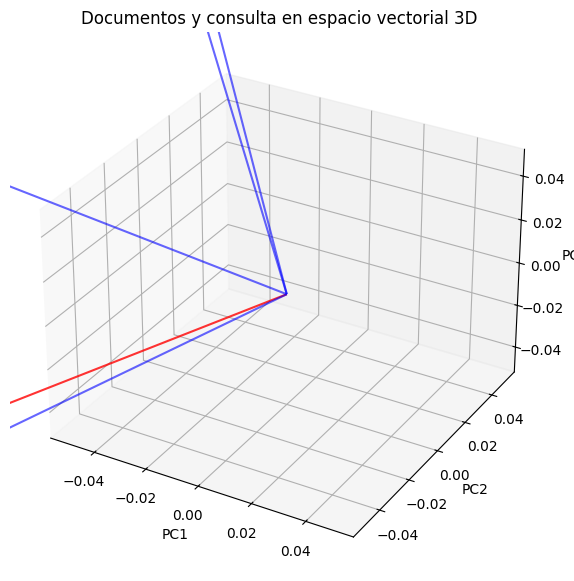

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# --- Consulta ---
consulta = "cama importante"

# Vector de la consulta en el mismo espacio que los documentos
consulta_vec = []
for term in matriz.index:
    consulta_vec.append(consulta.lower().split().count(term))
consulta_vec = np.array(consulta_vec).reshape(1, -1)

# Similitud coseno
similitudes = cosine_similarity(consulta_vec, matriz.T.values)[0]
for i, sim in enumerate(similitudes):
    print(f"Similitud coseno consulta - D{i+1}: {sim:.2f}")

# --- Visualización 2D ---
consulta_2d = pca.transform(consulta_vec)

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.2, head_length=0.2, fc='blue', ec='blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10)
plt.arrow(0, 0, consulta_2d[0,0], consulta_2d[0,1], head_width=0.2, head_length=0.2, fc='red', ec='red', alpha=0.8)
plt.text(consulta_2d[0,0]*1.1, consulta_2d[0,1]*1.1, "Consulta", fontsize=12, color='red')
plt.title("Documentos y consulta en espacio vectorial 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# --- Visualización 3D ---
pca3d = PCA(n_components=3)
docs_3d = pca3d.fit_transform(matriz.T)
consulta_3d = pca3d.transform(consulta_vec)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6)
    ax.text(x * 1.1, y * 1.1, z * 1.1, f"D{i+1}", fontsize=10)
ax.quiver(0, 0, 0, consulta_3d[0,0], consulta_3d[0,1], consulta_3d[0,2], color='red', alpha=0.8)
ax.text(consulta_3d[0,0]*1.1, consulta_3d[0,1]*1.1, consulta_3d[0,2]*1.1, "Consulta", fontsize=12, color='red')
ax.set_title("Documentos y consulta en espacio vectorial 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ranking de documentos por similitud coseno:
Documento D4: 0.535
Documento D3: 0.183
Documento D1: 0.000
Documento D2: 0.000


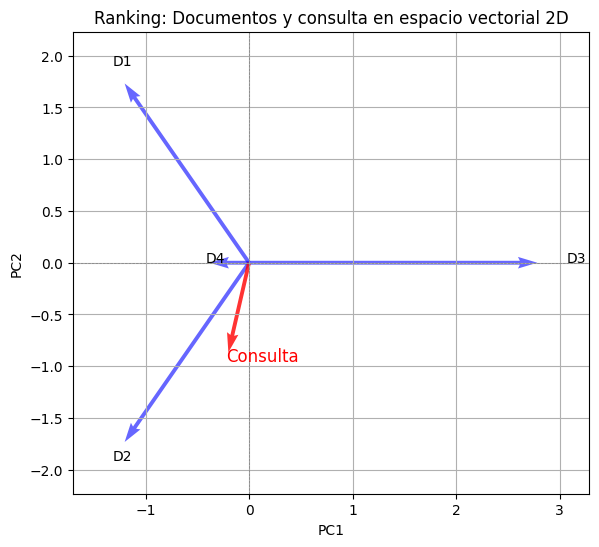

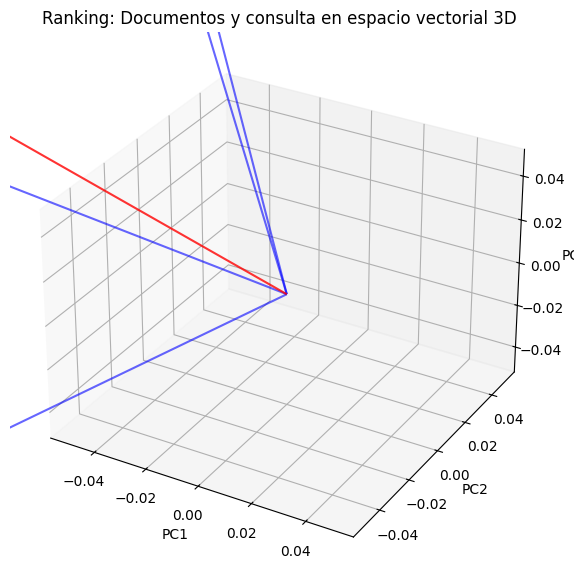

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ranking_por_similitud(consulta, matriz, docs_2d, docs_3d, pca, pca3d):
    # Vector de la consulta en el mismo espacio
    consulta_vec = []
    for term in matriz.index:
        consulta_vec.append(consulta.lower().split().count(term))
    consulta_vec = np.array(consulta_vec).reshape(1, -1)
    # Similitud coseno
    similitudes = cosine_similarity(consulta_vec, matriz.T.values)[0]
    ranking = sorted([(i+1, sim) for i, sim in enumerate(similitudes)], key=lambda x: x[1], reverse=True)
    print("Ranking de documentos por similitud coseno:")
    for doc, sim in ranking:
        print(f"Documento D{doc}: {sim:.3f}")
    # Proyección consulta
    consulta_2d = pca.transform(pd.DataFrame(consulta_vec, columns=matriz.index))
    consulta_3d = pca3d.transform(pd.DataFrame(consulta_vec, columns=matriz.index))
   # Visualización 2D (ajustada)
    plt.figure(figsize=(10, 6))
    # Calcular límites adecuados
    all_x = np.append(docs_2d[:,0], consulta_2d[0,0])
    all_y = np.append(docs_2d[:,1], consulta_2d[0,1])
    margin = 0.5
    plt.xlim(all_x.min() - margin, all_x.max() + margin)
    plt.ylim(all_y.min() - margin, all_y.max() + margin)
    for i, (x, y) in enumerate(docs_2d):
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)
        plt.text(x * 1.1, y * 1.1, f"D{i+1}", fontsize=10)
    plt.quiver(0, 0, consulta_2d[0,0], consulta_2d[0,1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)
    plt.text(consulta_2d[0,0]*1.1, consulta_2d[0,1]*1.1, "Consulta", fontsize=12, color='red')
    plt.title("Ranking: Documentos y consulta en espacio vectorial 2D")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.axhline(0, color='gray', linestyle='--', lw=0.5)
    plt.axvline(0, color='gray', linestyle='--', lw=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # Visualización 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    for i, (x, y, z) in enumerate(docs_3d):
        ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6)
        ax.text(x * 1.1, y * 1.1, z * 1.1, f"D{i+1}", fontsize=10)
    ax.quiver(0, 0, 0, consulta_3d[0,0], consulta_3d[0,1], consulta_3d[0,2], color='red', alpha=0.8)
    ax.text(consulta_3d[0,0]*1.1, consulta_3d[0,1]*1.1, consulta_3d[0,2]*1.1, "Consulta", fontsize=12, color='red')
    ax.set_title("Ranking: Documentos y consulta en espacio vectorial 3D")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.show()

# Ejemplo de uso:
consulta = "limpieza jardín"
ranking_por_similitud(consulta, matriz, docs_2d, docs_3d, pca, pca3d)